In [164]:
import random
class JogoDeForca:
    def __init__(self):
        import requests
        url = 'https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt'
        r = requests.get(url, allow_redirects=True)
        if r.status_code==200:
            self.content = str(r.content.decode()).split('\n')
        #else:
            #print("Erro: ", r.status_code)
    
    def novo_jogo(self, vidas=5):
        self.vidas = vidas
        self.palavra = random.choice(self.content)
        return len(self.palavra)

    def tentar_letra(self, letra):
        if self.vidas > 0:
            if letra in self.palavra:
                return [idx for idx in range(len(self.palavra)) if self.palavra[idx]==letra]
            else:
                self.vidas -= 1
                if self.vidas == 0:
                    #print("Fim de jogo!")
                    return False
                else:
                    return []
        
    def tentar_palavra(self, palavra):
        if self.vidas > 0:
            if self.palavra == palavra:
                #print ("Ganhou!")
                return True
            else:
                self.vidas = 0
                #print("Fim de jogo!")
                return False

In [165]:
def letra_frequente(letras_tentadas, lista):
    dict = {}
    for palavra in lista:
        for letra in palavra:
           if letra not in letras_tentadas:
                if letra in dict:
                    dict[letra] += 1
                else:
                    dict[letra] = 1
    return max(dict, key=dict.get)




In [166]:
def filtrar_palavras(palavras, num):
    lista = []
    for palavra in palavras:
        if len(palavra) == num:
            lista.append(palavra)
    return lista

In [185]:
def main():
    jogo = JogoDeForca()
    tamanho_palavra = jogo.novo_jogo()
    letras_tentadas = []
    lista_filtrada = filtrar_palavras(jogo.content, tamanho_palavra)

    while jogo.vidas > 0:
        letra = letra_frequente(letras_tentadas, lista_filtrada)
        resultado = jogo.tentar_letra(letra)
        letras_tentadas.append(letra)

        if resultado == False:
            print(jogo.palavra)
            return False

        elif resultado != []:
            nova_lista = [palavra for palavra in lista_filtrada if all(palavra[idx] == letra for idx in resultado)]

        else:
            nova_lista = [i for i in lista_filtrada if letra not in i]

        lista_filtrada = nova_lista

        if len(lista_filtrada) == 1:
            return jogo.tentar_palavra(lista_filtrada[0])
    
    return False

## Analisando os principais casos de erros

In [186]:
ganhou = 0
for i in range(200):
    if main():
        ganhou += 1

inegavel
atalharao
falho
arcabuz
adelgacou
golpeara
abalizas
coexista
pulavas


Com os resultados das palavras acima, podemos entender que quanto menos repetições de uma letra na palavra, mais dificil é de acertar a palavra, tendo em vista que essa situação restringe menos os possíveis resultados, dando mais possibilidades de erros.

Além disso, posições onde a letra se repete porém em lugares "comuns" não eliminam muitas possibilidades, como por exemplo a letra "a" na posição 2, que é uma posição comum para essa na lingua portuguesa, e por isso não elimina muitas possibilidades.

## Probabilidade de vitória com 200 iterações

In [190]:
print("Ganhou: ", ganhou)
print("Perdeu: ", 200-ganhou)

Ganhou:  191
Perdeu:  9


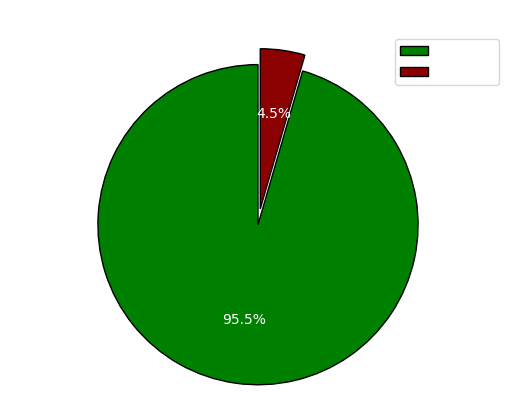

In [209]:
#plot o gráfico de pizza
import matplotlib.pyplot as plt
labels = 'Ganhou', 'Perdeu'
sizes = [ganhou, 200-ganhou]
explode = (0, 0.1)  # somente explode o segundo pedaço
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90)
ax1.axis('equal')  # Assegura que o gráfico é desenhado em um círculo.
ax1.patches[0].set_facecolor('green')
ax1.patches[1].set_facecolor('darkred')
# colocar borda rosa
for w in ax1.patches:
    w.set_linewidth(1)
    w.set_edgecolor('black')
ax1.legend(labels, loc='upper right')
plt.title('Probabilidade de ganhar')
plt.show()